In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from matplotlib.path import Path
%matplotlib inline

import numpy as np

from learning_utilities import *

Setting environment for Gordon


No vtk
Cannot import mxnet.


In [2]:
from sklearn.externals import joblib

In [3]:
# def convert_to_surround_name(name_u, suffix):
#     return name_u + '_surround_' + suffix

In [92]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

In [93]:
# structures = ['6N']
# labels_to_sample = structures + map(convert_to_surround_name, structures)
# labels_to_sample = structures + [convert_to_surround_name(l, surr_l) for l in structures for surr_l in structures + ['noclass'] if surr_l != l]
labels_to_sample = structures + [l + '_negative' for l in structures]

In [95]:
# Extract training features - random subset
# 1000 samples per landmark

training_addresses = defaultdict(list)

labels = set([])

# for stack in ['MD589', 'MD585', 'MD594']:
for stack in ['MD635']: # Neurotrace stack
    annotation_grid_indices_fn = '/home/yuncong/csd395/CSHL_labelings_v3/%(stack)s/%(stack)s_annotation_grid_indices.h5' % dict(stack=stack)
    label_gridIndices = read_hdf(annotation_grid_indices_fn, 'grid_indices')
    
    labels_this_stack = set(label_gridIndices.index) & set(labels_to_sample)
    labels = labels | labels_this_stack
    
    training_addresses_sec_idx = sample_locations(label_gridIndices, labels_this_stack, 
                                                  num_samples_per_landmark=1000)
        
    for name_u, addresses in training_addresses_sec_idx.iteritems():
        training_addresses[name_u] += [(stack, ) + addr for addr in addresses]
        
training_addresses.default_factory = None
        
# sampled_addresses = {name_u: np.array(addresses) for name_u, addresses in sampled_addresses.iteritems()}

In [96]:
existing_names = set([convert_to_original_name(l) for l in labels])

In [65]:
# See if we can use location on image frame as feature

# def addresses_to_locations(addresses):
    
#     key_func = lambda (i, (st, se, idx)): st
    
#     locations = []
    
#     for stack, group in groupby(sorted(enumerate(addresses), key=key_func), key=key_func):
#         sample_locations = grid_parameters_to_sample_locations(get_default_gridspec(stack))
#         for i, (st, se, idx) in group:
#             locations.append((i, sample_locations[idx]))
    
#     return [loc for i, loc in sorted(locations)]

In [66]:
# locations = np.array(addresses_to_locations(training_addresses['10N']))

# plt.scatter(locations[:,0], locations[:,1]);
# plt.xlim([0, 15000]);
# plt.ylim([0, 12000]);

In [98]:
training_features = apply_function_to_dict(addresses_to_features, training_addresses)

('MD635', 75)
('MD635', 76)


Patch in annotation but not in mask: MD635 76 MD635-F26-2016.05.18-21.16.59_MD635_1_0076 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @192


('MD635', 77)
('MD635', 78)
('MD635', 79)
('MD635', 80)
('MD635', 81)
('MD635', 82)


Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @34795
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @31787
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @32541
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @33040
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @34294
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @28772


('MD635', 83)
('MD635', 84)


Patch in annotation but not in mask: MD635 84 MD635-F28-2016.05.18-21.46.26_MD635_3_0084 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @70


('MD635', 85)
('MD635', 86)
('MD635', 87)


Patch in annotation but not in mask: MD635 87 MD635-F29-2016.05.18-22.01.14_MD635_3_0087 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @87


('MD635', 88)
('MD635', 89)


Patch in annotation but not in mask: MD635 89 MD635-F30-2016.05.18-22.15.39_MD635_2_0089 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @151
Patch in annotation but not in mask: MD635 89 MD635-F30-2016.05.18-22.15.39_MD635_2_0089 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @120
Patch in annotation but not in mask: MD635 89 MD635-F30-2016.05.18-22.15.39_MD635_2_0089 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @44


('MD635', 90)
('MD635', 91)


Patch in annotation but not in mask: MD635 91 MD635-F31-2016.05.18-22.31.18_MD635_1_0091 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @96
Patch in annotation but not in mask: MD635 91 MD635-F31-2016.05.18-22.31.18_MD635_1_0091 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @200


('MD635', 92)


Patch in annotation but not in mask: MD635 92 MD635-F31-2016.05.18-22.31.18_MD635_2_0092 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @143
Patch in annotation but not in mask: MD635 92 MD635-F31-2016.05.18-22.31.18_MD635_2_0092 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @43


('MD635', 94)
('MD635', 95)


Patch in annotation but not in mask: MD635 95 MD635-F32-2016.05.18-22.50.16_MD635_2_0095 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @99


('MD635', 96)
('MD635', 97)
('MD635', 98)
('MD635', 99)


Patch in annotation but not in mask: MD635 99 MD635-F33-2016.05.18-23.06.34_MD635_3_0099 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @95


('MD635', 100)


Patch in annotation but not in mask: MD635 100 MD635-F34-2016.05.18-23.23.55_MD635_1_0100 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @128


('MD635', 101)


Patch in annotation but not in mask: MD635 101 MD635-F34-2016.05.18-23.23.55_MD635_2_0101 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @77


('MD635', 102)
('MD635', 103)
('MD635', 104)


Patch in annotation but not in mask: MD635 104 MD635-F35-2016.05.18-23.40.52_MD635_2_0104 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @139


('MD635', 105)
('MD635', 106)
('MD635', 107)


Patch in annotation but not in mask: MD635 107 MD635-F36-2016.05.18-23.59.35_MD635_2_0107 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @181
Patch in annotation but not in mask: MD635 107 MD635-F36-2016.05.18-23.59.35_MD635_2_0107 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @129
Patch in annotation but not in mask: MD635 107 MD635-F36-2016.05.18-23.59.35_MD635_2_0107 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @154


('MD635', 108)
('MD635', 109)
('MD635', 110)
('MD635', 111)


Patch in annotation but not in mask: MD635 111 MD635-F37-2016.05.23-14.05.18_MD635_3_0111 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @44


('MD635', 112)
('MD635', 113)
('MD635', 114)
('MD635', 115)
('MD635', 116)


Patch in annotation but not in mask: MD635 116 MD635-F39-2016.05.19-00.52.10_MD635_2_0116 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @229
Patch in annotation but not in mask: MD635 116 MD635-F39-2016.05.19-00.52.10_MD635_2_0116 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @156
Patch in annotation but not in mask: MD635 116 MD635-F39-2016.05.19-00.52.10_MD635_2_0116 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @97


('MD635', 117)


Patch in annotation but not in mask: MD635 117 MD635-F39-2016.05.19-00.52.10_MD635_3_0117 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @199


('MD635', 118)
('MD635', 119)


Patch in annotation but not in mask: MD635 119 MD635-F40-2016.05.19-01.08.51_MD635_2_0119 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @190


('MD635', 120)
('MD635', 121)
('MD635', 122)
('MD635', 123)


Patch in annotation but not in mask: MD635 123 MD635-F41-2016.05.19-01.28.39_MD635_3_0123 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @88


('MD635', 124)


Patch in annotation but not in mask: MD635 124 MD635-F42-2016.05.19-01.47.04_MD635_1_0124 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @26


('MD635', 125)


Patch in annotation but not in mask: MD635 125 MD635-F42-2016.05.19-01.47.04_MD635_2_0125 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @52


('MD635', 126)
('MD635', 127)


Patch in annotation but not in mask: MD635 127 MD635-F43-2016.05.19-02.06.14_MD635_1_0127 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @123


('MD635', 128)
('MD635', 129)
('MD635', 130)
('MD635', 131)
('MD635', 132)
('MD635', 133)
('MD635', 134)
('MD635', 135)
('MD635', 136)
('MD635', 137)
('MD635', 138)


Patch in annotation but not in mask: MD635 138 MD635-F46-2016.05.19-03.02.11_MD635_3_0138 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @50
Patch in annotation but not in mask: MD635 138 MD635-F46-2016.05.19-03.02.11_MD635_3_0138 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @95


('MD635', 139)
('MD635', 140)


Patch in annotation but not in mask: MD635 140 MD635-F47-2016.05.19-03.19.48_MD635_2_0140 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @42100


('MD635', 141)
('MD635', 142)
('MD635', 143)
('MD635', 144)


Patch in annotation but not in mask: MD635 144 MD635-F48-2016.05.19-03.40.12_MD635_3_0144 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @120
Patch in annotation but not in mask: MD635 144 MD635-F48-2016.05.19-03.40.12_MD635_3_0144 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @192


('MD635', 145)
('MD635', 146)


Patch in annotation but not in mask: MD635 146 MD635-F49-2016.05.19-03.59.43_MD635_2_0146 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @113
Patch in annotation but not in mask: MD635 146 MD635-F49-2016.05.19-03.59.43_MD635_2_0146 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @81


('MD635', 147)
('MD635', 148)
('MD635', 149)
('MD635', 150)
('MD635', 151)


Patch in annotation but not in mask: MD635 151 MD635-F51-2016.05.23-15.04.39_MD635_1_0151 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @84


('MD635', 152)
('MD635', 153)


Patch in annotation but not in mask: MD635 153 MD635-F51-2016.05.23-15.04.39_MD635_3_0153 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @132


('MD635', 154)
('MD635', 155)


Patch in annotation but not in mask: MD635 155 MD635-F52-2016.05.19-04.56.12_MD635_2_0155 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @179


('MD635', 156)
('MD635', 157)
('MD635', 158)
('MD635', 159)
('MD635', 160)
('MD635', 161)
('MD635', 162)


Patch in annotation but not in mask: MD635 162 MD635-F55-2016.05.19-05.55.53_MD635_2_0164 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @181


('MD635', 163)


Patch in annotation but not in mask: MD635 163 MD635-F55-2016.05.23-16.24.34_MD635_3_0165 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @41


('MD635', 164)
('MD635', 165)


Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @92
Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @85
Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @84


('MD635', 166)
('MD635', 167)
('MD635', 168)
('MD635', 169)
('MD635', 170)
('MD635', 171)


Patch in annotation but not in mask: MD635 171 MD635-F59-2016.05.19-07.14.24_MD635_2_0176 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @233
Patch in annotation but not in mask: MD635 171 MD635-F59-2016.05.19-07.14.24_MD635_2_0176 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @44


('MD635', 172)


Patch in annotation but not in mask: MD635 172 MD635-F60-2016.05.19-07.35.14_MD635_1_0178 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @99


('MD635', 173)


Patch in annotation but not in mask: MD635 173 MD635-F60-2016.05.19-07.35.14_MD635_2_0179 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @144


('MD635', 174)
('MD635', 175)
('MD635', 176)


Patch in annotation but not in mask: MD635 176 MD635-F62-2016.05.19-08.18.25_MD635_1_0184 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @232


('MD635', 177)
('MD635', 178)
('MD635', 179)
('MD635', 180)
('MD635', 181)


Patch in annotation but not in mask: MD635 181 MD635-F64-2016.05.19-09.00.59_MD635_2_0191 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @26


('MD635', 182)
('MD635', 183)
('MD635', 184)
('MD635', 185)
('MD635', 186)


Patch in annotation but not in mask: MD635 186 MD635-F67-2016.05.19-09.59.06_MD635_1_0199 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @15562


('MD635', 187)
('MD635', 188)


Patch in annotation but not in mask: MD635 188 MD635-F68-2016.05.19-10.18.40_MD635_1_0202 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @212
Patch in annotation but not in mask: MD635 188 MD635-F68-2016.05.19-10.18.40_MD635_1_0202 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @107


('MD635', 189)


Patch in annotation but not in mask: MD635 189 MD635-F68-2016.05.19-10.18.40_MD635_2_0203 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @226


('MD635', 190)
('MD635', 191)
('MD635', 192)


Patch in annotation but not in mask: MD635 192 MD635-F70-2016.05.19-10.57.59_MD635_1_0208 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @190


('MD635', 193)
('MD635', 194)


Patch in annotation but not in mask: MD635 194 MD635-F71-2016.05.19-11.17.07_MD635_1_0211 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @217


('MD635', 195)
('MD635', 196)
('MD635', 197)


Patch in annotation but not in mask: MD635 197 MD635-F72-2016.05.19-11.37.07_MD635_2_0215 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @225


('MD635', 198)


Patch in annotation but not in mask: MD635 198 MD635-F73-2016.05.19-11.56.44_MD635_1_0217 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @41
Patch in annotation but not in mask: MD635 198 MD635-F73-2016.05.19-11.56.44_MD635_1_0217 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @143


('MD635', 199)
('MD635', 200)


Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @21037
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @19781
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @22541
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @21789
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @19529
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @19280
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo 

('MD635', 201)


Patch in annotation but not in mask: MD635 201 MD635-F74-2016.05.19-12.15.18_MD635_2_0221 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @211


('MD635', 202)
('MD635', 203)


Patch in annotation but not in mask: MD635 203 MD635-F75-2016.05.19-12.32.46_MD635_2_0224 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @41


('MD635', 204)


Patch in annotation but not in mask: MD635 204 MD635-F76-2016.05.19-12.50.14_MD635_1_0226 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @200
Patch in annotation but not in mask: MD635 204 MD635-F76-2016.05.19-12.50.14_MD635_1_0226 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @69


('MD635', 206)


Patch in annotation but not in mask: MD635 206 MD635-F77-2016.05.19-13.07.42_MD635_1_0229 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @129


('MD635', 207)


Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @166


('MD635', 208)


Patch in annotation but not in mask: MD635 208 MD635-F78-2016.05.19-13.26.25_MD635_1_0232 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @79
Patch in annotation but not in mask: MD635 208 MD635-F78-2016.05.19-13.26.25_MD635_1_0232 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @66


('MD635', 209)


Patch in annotation but not in mask: MD635 209 MD635-F78-2016.05.19-13.26.25_MD635_2_0233 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @92


('MD635', 210)


Patch in annotation but not in mask: MD635 210 MD635-F79-2016.05.19-13.44.43_MD635_1_0235 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @42
Patch in annotation but not in mask: MD635 210 MD635-F79-2016.05.19-13.44.43_MD635_1_0235 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @150
Patch in annotation but not in mask: MD635 210 MD635-F79-2016.05.19-13.44.43_MD635_1_0235 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @188


('MD635', 211)
('MD635', 212)
('MD635', 213)


Patch in annotation but not in mask: MD635 213 MD635-F80-2016.05.19-14.03.50_MD635_2_0239 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @219


('MD635', 214)


Patch in annotation but not in mask: MD635 214 MD635-F81-2016.05.19-14.21.58_MD635_1_0241 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @126
Patch in annotation but not in mask: MD635 214 MD635-F81-2016.05.19-14.21.58_MD635_1_0241 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @31
Patch in annotation but not in mask: MD635 214 MD635-F81-2016.05.19-14.21.58_MD635_1_0241 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @156


('MD635', 216)


Patch in annotation but not in mask: MD635 216 MD635-F82-2016.05.19-14.39.57_MD635_1_0244 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @85


('MD635', 217)


Patch in annotation but not in mask: MD635 217 MD635-F82-2016.05.19-14.39.57_MD635_2_0245 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @118


('MD635', 218)


Patch in annotation but not in mask: MD635 218 MD635-F83-2016.05.19-14.59.24_MD635_1_0247 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @98


('MD635', 219)
('MD635', 220)


Patch in annotation but not in mask: MD635 220 MD635-F84-2016.05.19-15.18.11_MD635_1_0250 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @240
Patch in annotation but not in mask: MD635 220 MD635-F84-2016.05.19-15.18.11_MD635_1_0250 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @57


('MD635', 221)


Patch in annotation but not in mask: MD635 221 MD635-F84-2016.05.19-15.18.11_MD635_2_0251 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @116


('MD635', 222)


Patch in annotation but not in mask: MD635 222 MD635-F85-2016.05.19-15.36.47_MD635_1_0253 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @69


('MD635', 223)


Patch in annotation but not in mask: MD635 223 MD635-F85-2016.05.19-15.36.47_MD635_2_0254 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @83
Patch in annotation but not in mask: MD635 223 MD635-F85-2016.05.19-15.36.47_MD635_2_0254 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @113


('MD635', 224)


Patch in annotation but not in mask: MD635 224 MD635-F86-2016.05.19-15.55.34_MD635_1_0256 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @34


('MD635', 225)


Patch in annotation but not in mask: MD635 225 MD635-F86-2016.05.19-15.55.34_MD635_2_0257 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @65


('MD635', 226)


Patch in annotation but not in mask: MD635 226 MD635-F87-2016.05.19-16.15.25_MD635_1_0259 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @205
Patch in annotation but not in mask: MD635 226 MD635-F87-2016.05.19-16.15.25_MD635_1_0259 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @242


('MD635', 227)
('MD635', 228)


Patch in annotation but not in mask: MD635 228 MD635-F88-2016.05.19-16.34.48_MD635_1_0262 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @118


('MD635', 229)
('MD635', 230)


Patch in annotation but not in mask: MD635 230 MD635-F89-2016.05.19-16.53.54_MD635_1_0265 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @153


('MD635', 231)


Patch in annotation but not in mask: MD635 231 MD635-F89-2016.05.19-16.53.54_MD635_2_0266 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @226


('MD635', 233)
('MD635', 234)


Patch in annotation but not in mask: MD635 234 MD635-F91-2016.05.19-17.33.31_MD635_1_0271 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @232
Patch in annotation but not in mask: MD635 234 MD635-F91-2016.05.19-17.33.31_MD635_1_0271 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @204
Patch in annotation but not in mask: MD635 234 MD635-F91-2016.05.19-17.33.31_MD635_1_0271 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @145
Patch in annotation but not in mask: MD635 234 MD635-F91-2016.05.19-17.33.31_MD635_1_0271 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @106


('MD635', 235)


Patch in annotation but not in mask: MD635 235 MD635-F91-2016.05.19-17.33.31_MD635_2_0272 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @213


('MD635', 236)
('MD635', 237)
('MD635', 238)


Patch in annotation but not in mask: MD635 238 MD635-F93-2016.05.19-18.12.24_MD635_1_0277 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @135
Patch in annotation but not in mask: MD635 238 MD635-F93-2016.05.19-18.12.24_MD635_1_0277 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @124


('MD635', 239)
('MD635', 240)


Patch in annotation but not in mask: MD635 240 MD635-F94-2016.05.19-18.31.07_MD635_1_0280 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @241
Patch in annotation but not in mask: MD635 240 MD635-F94-2016.05.19-18.31.07_MD635_1_0280 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @231


In [99]:
training_features = {name: np.array([f for f in feats if f is not None]) 
                     for name, feats in training_features.iteritems()}

In [100]:
for name in sorted(training_features.iterkeys()):
    print name, len(training_features[name])

10N 1000
10N_negative 991
12N 1000
12N_negative 996
5N 1000
5N_negative 998
6N 496
6N_negative 997
7N 999
7N_negative 999
7n 1000
7n_negative 996
AP 923
AP_negative 994
DC 1000
DC_negative 993
IC 1000
IC_negative 991
LC 1000
LC_negative 999
Pn 993
Pn_negative 994
RtTg 1000
RtTg_negative 993
SC 1000
SC_negative 992
SNC 949
SNC_negative 996
SNR 1000
SNR_negative 998
Sp5C 1000
Sp5C_negative 996
Tz 1000
Tz_negative 996
VCA 994
VCA_negative 994
VCP 1000
VCP_negative 990
VLL 1000
VLL_negative 997


In [68]:
# negatives are surrounding patches that are not of other positive classes
# LogisticRegression(penalty='l2')
# train_sample_scheme = 1

# negatives are surrounding patches that include other positive classes
# LogisticRegression(penalty='l1')
# train_sample_scheme = 2

# negatives are surrounding patches that are not of other positive classes
# SVC(kernel='linear')
# train_sample_scheme = 3

# negatives are surrounding patches that are not of other positive classes
# LinearSVC(kernel='linear') + CalibratedClassifierCV
# train_sample_scheme = 4

# negatives are surrounding patches that are not of other positive classes
# XGBClassifier
# train_sample_scheme = 5

# negatives are surrounding patches that are not of other positive classes
# sklearn.ensemble.GradientBoostingClassifier, max_depth=3, n_estimators=200
# train_sample_scheme = 6

# negatives are surrounding patches that are not of other positive classes
# sklearn.ensemble.GradientBoostingClassifier, max_depth=5, n_estimators=100
# train_sample_scheme = 7

train_sample_scheme = 8

In [101]:
# Save training features

train_feat_dir = create_if_not_exists(os.path.join(SVM_NTBLUE_ROOTDIR, 'training_features/'))

for name_u, feats in training_features.iteritems():
    bp.pack_ndarray_file(feats, os.path.join(train_feat_dir, name_u + '_trainSampleScheme_%d.bp' % train_sample_scheme))

In [102]:
# Load training features

training_features = {name_u: bp.unpack_ndarray_file(os.path.join(SVM_NTBLUE_ROOTDIR, 'training_features', \
                                 name_u + '_trainSampleScheme_%d.bp' % train_sample_scheme))
                     for name_u in labels}

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
from xgboost.sklearn import XGBClassifier

In [105]:
# train svm classifiers

svm_dir = create_if_not_exists(os.path.join(SVM_NTBLUE_ROOTDIR, 'classifiers'))
# svm_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR + '/trainSampleScheme_%(scheme)d' % {'scheme':train_sample_scheme}))

# for label in structures:
for label in existing_names:
            
    print label

    t = time.time()

    features_pos = training_features[label]
    
    if train_sample_scheme in [1, 3, 4, 5, 6, 7]:
        features_neg = training_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([training_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [training_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    elif train_sample_scheme == 8:
        features_neg = training_features[label + '_negative']
    else:
        sys.stderr.write('training scheme is not recognized.\n')
   
    train_data0 = np.r_[features_pos, features_neg]
    train_labels0 = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
#     n_train = len(train_labels0)
#     ri = np.random.choice(range(n_train), size=100, replace=False)
#     train_data = train_data0[ri]
#     train_labels = train_labels0[ri]

    train_data = train_data0
    train_labels = train_labels0
    
#     svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
#           probability=True, tol=0.001, cache_size=1000, class_weight=None, verbose=False, 
#           max_iter=-1, decision_function_shape=None, random_state=None)

    if train_sample_scheme in [1, 8]:
        # L2 penalty - train: 0.88, test acc: 0.84
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

    elif train_sample_scheme == 2:
        # L1 penalty - test acc: 0.818
        clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

            
    elif train_sample_scheme == 3:
        # Slow - train acc: 0.69, test acc: 0.68
        clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=1000, max_iter=-1,
              decision_function_shape=None, random_state=None)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})


    elif train_sample_scheme == 4:
        # train 0.75, test 0.74
        
        sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                                C=1.0, multi_class='ovr', 
                                fit_intercept=True, intercept_scaling=1, max_iter=100)
        clf = CalibratedClassifierCV(sv_uncalibrated)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

        
    elif train_sample_scheme == 5:
        # train 
        
        # http://xgboost.readthedocs.io/en/latest/python/python_api.html
        clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                            silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                            min_child_weight=20, max_delta_step=0, subsample=.8, 
                            colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                            scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(svc, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

    elif train_sample_scheme == 6:
        # acc: 0.96/0.85
        
        # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=3, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')
        
    elif train_sample_scheme == 7:
        # acc: 0.98/0.87
        
        # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=5, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')
        
    
    else:
        sys.stderr.write('training scheme is not recognized.\n')
 
    sys.stderr.write('train classifier: %.2f seconds\n' % (time.time() - t))
    
    clf.fit(train_data, train_labels)
    joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})
        
#     del features_pos, features_neg, train_data, train_labels, svc

VCA


train classifier: 0.00 seconds


Tz


train classifier: 0.00 seconds


SNC


train classifier: 0.00 seconds


7n


train classifier: 0.00 seconds


DC


train classifier: 0.00 seconds


12N


train classifier: 0.00 seconds


Sp5C


train classifier: 0.00 seconds


VCP


train classifier: 0.00 seconds


AP


train classifier: 0.00 seconds


6N


train classifier: 0.00 seconds


5N


train classifier: 0.00 seconds


SNR


train classifier: 0.00 seconds


RtTg


train classifier: 0.00 seconds


7N


train classifier: 0.00 seconds


SC


train classifier: 0.00 seconds


10N


train classifier: 0.00 seconds


IC


train classifier: 0.00 seconds


Pn


train classifier: 0.00 seconds


VLL


train classifier: 0.00 seconds


LC


train classifier: 0.00 seconds


# Load pre-computed svm classifiers

In [106]:
svc_allClasses = {}
# for label in structures:
for label in existing_names:
    svc_allClasses[label] = joblib.load(SVM_NTBLUE_ROOTDIR + '/classifiers/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

In [72]:
# visualize training patches

In [73]:
patches = extract_patches_given_locations_multiple_sections(sampled_addresses['AP'], 'grid_index')

NameError: name 'sampled_addresses' is not defined

In [ ]:
display_images_in_grids(patches, 5)

In [ ]:
patches = extract_patches_given_locations_multiple_sections(sampled_addresses['AP_surround'], 'grid_index')

In [ ]:
display_images_in_grids(patches, 5, titles=sampled_addresses['AP_surround'])

In [83]:
# Visualize a patch in context

patch_size, stride, _, _ = get_default_gridspec('MD635')
grid_locations = grid_parameters_to_sample_locations(get_default_gridspec('MD635'))
viz = patch_boxes_overlay_on('original', 8, 
                       [grid_locations[44453]],
                      patch_size=patch_size,
                      stack='MD635',
                       sec=219)
display_image(viz)

/oasis/projects/nsf/csd395/yuncong/Brain/learning/tmp.jpg

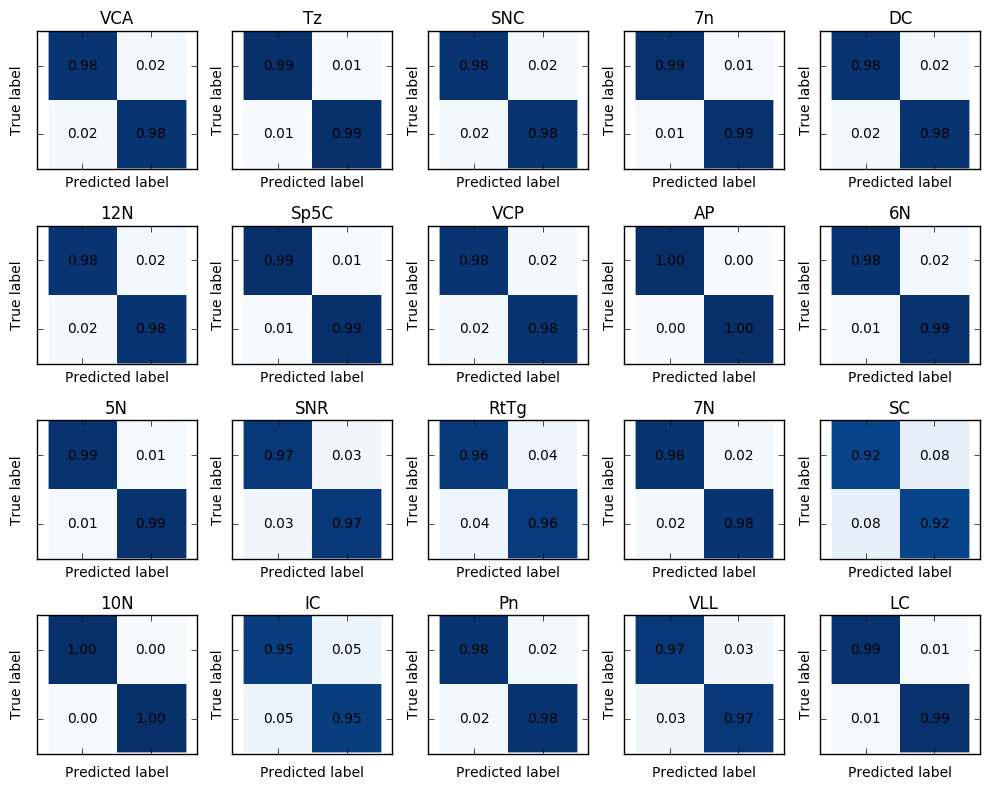

In [107]:
# Compute training accuracy

acc_all_structures = {}

nrows = int(np.ceil(len(existing_names)/5.))
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
axes = axes.flatten()

# for i, label in enumerate(structures):
for i, label in enumerate(existing_names):
    
    features_pos = training_features[label]
    
    if train_sample_scheme in [1,3,4,5,6,7]:
        features_neg = training_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([training_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [training_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    elif train_sample_scheme == 8:
        features_neg = training_features[label + '_negative']
    else:
        sys.stderr.write('training scheme is not recognized.\n')

    
    train_data = np.r_[features_pos, features_neg]
    train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
    svc = svc_allClasses[label]
    
    probs = svc.predict_proba(train_data)[:, svc.classes_.tolist().index(1.)]
    cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in train_labels], soft=True)
    
    acc_all_structures[label] = .5 * (cm[0,0] + cm[1,1])
    
    plot_confusion_matrix(cm, title='%(label)s'% {'label':label},
                          labels=['',''],
#                           labels=[label, convert_to_surround_name(label)],
                         axis=axes[i])
#     plt.show();

plt.tight_layout()

In [108]:
print 'training accuracy:', np.mean(acc_all_structures.values())

training accuracy: 0.977588369254


# Test

In [109]:
# Extract test samples
# 1000 test samples per unsided name

test_addresses = defaultdict(list)

# for stack in ['MD589', 'MD585', 'MD594']:
for stack in ['MD635']:
    annotation_grid_indices_fn = '/home/yuncong/csd395/CSHL_labelings_v3/%(stack)s/%(stack)s_annotation_grid_indices.h5' % dict(stack=stack)
    label_gridIndices = read_hdf(annotation_grid_indices_fn, 'grid_indices')
    sampled_addresses_sec_idx = sample_locations(label_gridIndices, labels, num_samples_per_landmark=1000)
    
    for name_u, addresses in sampled_addresses_sec_idx.iteritems():
        test_addresses[name_u] += [(stack, ) + addr for addr in addresses]
        
test_addresses.default_factory = None
        
# sampled_addresses = {name_u: np.array(addresses) for name_u, addresses in sampled_addresses.iteritems()}

In [110]:
test_features = apply_function_to_dict(addresses_to_features, test_addresses)

('MD635', 75)
('MD635', 76)
('MD635', 77)
('MD635', 78)
('MD635', 79)
('MD635', 80)
('MD635', 81)
('MD635', 82)


Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @31786
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @31286
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @31536
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @34045
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @32037
Patch in annotation but not in mask: MD635 82 MD635-F28-2016.05.18-21.46.26_MD635_1_0082 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @32288


('MD635', 83)
('MD635', 84)
('MD635', 85)
('MD635', 86)


Patch in annotation but not in mask: MD635 86 MD635-F29-2016.05.18-22.01.14_MD635_2_0086 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @56


('MD635', 87)
('MD635', 88)


Patch in annotation but not in mask: MD635 88 MD635-F30-2016.05.18-22.15.39_MD635_1_0088 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @124


('MD635', 89)
('MD635', 90)
('MD635', 91)


Patch in annotation but not in mask: MD635 91 MD635-F31-2016.05.18-22.31.18_MD635_1_0091 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @186
Patch in annotation but not in mask: MD635 91 MD635-F31-2016.05.18-22.31.18_MD635_1_0091 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @227


('MD635', 92)
('MD635', 94)


Patch in annotation but not in mask: MD635 94 MD635-F32-2016.05.18-22.50.16_MD635_1_0094 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @175
Patch in annotation but not in mask: MD635 94 MD635-F32-2016.05.18-22.50.16_MD635_1_0094 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @130
Patch in annotation but not in mask: MD635 95 MD635-F32-2016.05.18-22.50.16_MD635_2_0095 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @219


('MD635', 95)
('MD635', 96)


Patch in annotation but not in mask: MD635 96 MD635-F32-2016.05.18-22.50.16_MD635_3_0096 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @80
Patch in annotation but not in mask: MD635 96 MD635-F32-2016.05.18-22.50.16_MD635_3_0096 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @221


('MD635', 97)
('MD635', 98)
('MD635', 99)


Patch in annotation but not in mask: MD635 99 MD635-F33-2016.05.18-23.06.34_MD635_3_0099 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @69
Patch in annotation but not in mask: MD635 99 MD635-F33-2016.05.18-23.06.34_MD635_3_0099 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @125
Patch in annotation but not in mask: MD635 100 MD635-F34-2016.05.18-23.23.55_MD635_1_0100 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @46


('MD635', 100)
('MD635', 101)


Patch in annotation but not in mask: MD635 101 MD635-F34-2016.05.18-23.23.55_MD635_2_0101 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @211


('MD635', 102)
('MD635', 103)


Patch in annotation but not in mask: MD635 103 MD635-F35-2016.05.18-23.40.52_MD635_1_0103 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @79


('MD635', 104)
('MD635', 105)


Patch in annotation but not in mask: MD635 105 MD635-F35-2016.05.18-23.40.52_MD635_3_0105 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @140
Patch in annotation but not in mask: MD635 105 MD635-F35-2016.05.18-23.40.52_MD635_3_0105 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @28


('MD635', 106)
('MD635', 107)
('MD635', 108)
('MD635', 109)


Patch in annotation but not in mask: MD635 109 MD635-F37-2016.05.23-14.05.18_MD635_1_0109 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @84


('MD635', 110)
('MD635', 111)
('MD635', 112)
('MD635', 113)
('MD635', 114)
('MD635', 115)
('MD635', 116)


Patch in annotation but not in mask: MD635 116 MD635-F39-2016.05.19-00.52.10_MD635_2_0116 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @142
Patch in annotation but not in mask: MD635 117 MD635-F39-2016.05.19-00.52.10_MD635_3_0117 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @183
Patch in annotation but not in mask: MD635 117 MD635-F39-2016.05.19-00.52.10_MD635_3_0117 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @194


('MD635', 117)
('MD635', 118)


Patch in annotation but not in mask: MD635 118 MD635-F40-2016.05.19-01.08.51_MD635_1_0118 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @84
Patch in annotation but not in mask: MD635 118 MD635-F40-2016.05.19-01.08.51_MD635_1_0118 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @141
Patch in annotation but not in mask: MD635 119 MD635-F40-2016.05.19-01.08.51_MD635_2_0119 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @119


('MD635', 119)
('MD635', 120)
('MD635', 121)


Patch in annotation but not in mask: MD635 121 MD635-F41-2016.05.19-01.28.39_MD635_1_0121 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @127
Patch in annotation but not in mask: MD635 121 MD635-F41-2016.05.19-01.28.39_MD635_1_0121 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @205


('MD635', 122)
('MD635', 123)
('MD635', 124)
('MD635', 125)


Patch in annotation but not in mask: MD635 125 MD635-F42-2016.05.19-01.47.04_MD635_2_0125 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @186


('MD635', 126)
('MD635', 127)
('MD635', 128)
('MD635', 129)
('MD635', 130)
('MD635', 131)
('MD635', 132)
('MD635', 133)
('MD635', 134)
('MD635', 135)
('MD635', 136)
('MD635', 137)
('MD635', 138)
('MD635', 139)


Patch in annotation but not in mask: MD635 139 MD635-F47-2016.05.19-03.19.48_MD635_1_0139 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @167
Patch in annotation but not in mask: MD635 140 MD635-F47-2016.05.19-03.19.48_MD635_2_0140 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @41100
Patch in annotation but not in mask: MD635 140 MD635-F47-2016.05.19-03.19.48_MD635_2_0140 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @121
Patch in annotation but not in mask: MD635 140 MD635-F47-2016.05.19-03.19.48_MD635_2_0140 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @218


('MD635', 140)
('MD635', 141)


Patch in annotation but not in mask: MD635 141 MD635-F47-2016.05.19-03.19.48_MD635_3_0141 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @130
Patch in annotation but not in mask: MD635 141 MD635-F47-2016.05.19-03.19.48_MD635_3_0141 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @193


('MD635', 142)


Patch in annotation but not in mask: MD635 142 MD635-F48-2016.05.19-03.40.12_MD635_1_0142 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @122


('MD635', 143)


Patch in annotation but not in mask: MD635 143 MD635-F48-2016.05.19-03.40.12_MD635_2_0143 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @201
Patch in annotation but not in mask: MD635 143 MD635-F48-2016.05.19-03.40.12_MD635_2_0143 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @37
Patch in annotation but not in mask: MD635 143 MD635-F48-2016.05.19-03.40.12_MD635_2_0143 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @88


('MD635', 144)


Patch in annotation but not in mask: MD635 144 MD635-F48-2016.05.19-03.40.12_MD635_3_0144 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @66
Patch in annotation but not in mask: MD635 144 MD635-F48-2016.05.19-03.40.12_MD635_3_0144 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @147
Patch in annotation but not in mask: MD635 144 MD635-F48-2016.05.19-03.40.12_MD635_3_0144 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @209


('MD635', 145)


Patch in annotation but not in mask: MD635 145 MD635-F49-2016.05.19-03.59.43_MD635_1_0145 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @55
Patch in annotation but not in mask: MD635 145 MD635-F49-2016.05.19-03.59.43_MD635_1_0145 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @205
Patch in annotation but not in mask: MD635 146 MD635-F49-2016.05.19-03.59.43_MD635_2_0146 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @71


('MD635', 146)
('MD635', 147)
('MD635', 148)


Patch in annotation but not in mask: MD635 148 MD635-F50-2016.05.23-14.45.07_MD635_1_0148 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @125


('MD635', 149)


Patch in annotation but not in mask: MD635 149 MD635-F50-2016.05.23-14.45.07_MD635_2_0149 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @177
Patch in annotation but not in mask: MD635 149 MD635-F50-2016.05.23-14.45.07_MD635_2_0149 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @146


('MD635', 150)
('MD635', 151)
('MD635', 152)
('MD635', 153)
('MD635', 154)


Patch in annotation but not in mask: MD635 154 MD635-F52-2016.05.23-15.23.47_MD635_1_0154 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @115


('MD635', 155)
('MD635', 156)
('MD635', 157)


Patch in annotation but not in mask: MD635 157 MD635-F53-2016.05.23-15.42.22_MD635_1_0157 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @42


('MD635', 158)
('MD635', 159)
('MD635', 160)
('MD635', 161)
('MD635', 162)
('MD635', 163)
('MD635', 164)
('MD635', 165)


Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @86
Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @133
Patch in annotation but not in mask: MD635 165 MD635-F56-2016.05.19-06.13.54_MD635_2_0167 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @185


('MD635', 166)
('MD635', 167)
('MD635', 168)
('MD635', 169)


Patch in annotation but not in mask: MD635 169 MD635-F58-2016.05.19-06.52.57_MD635_2_0173 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @102


('MD635', 170)
('MD635', 171)
('MD635', 172)


Patch in annotation but not in mask: MD635 172 MD635-F60-2016.05.19-07.35.14_MD635_1_0178 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @202


('MD635', 173)
('MD635', 174)


Patch in annotation but not in mask: MD635 174 MD635-F61-2016.05.19-07.56.43_MD635_1_0181 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @9287


('MD635', 175)


Patch in annotation but not in mask: MD635 175 MD635-F61-2016.05.19-07.56.43_MD635_2_0182 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @128


('MD635', 176)
('MD635', 177)
('MD635', 178)


Patch in annotation but not in mask: MD635 178 MD635-F63-2016.05.19-08.39.03_MD635_1_0187 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @171


('MD635', 179)
('MD635', 180)
('MD635', 181)
('MD635', 182)
('MD635', 183)
('MD635', 184)
('MD635', 185)
('MD635', 186)
('MD635', 187)
('MD635', 188)
('MD635', 189)


Patch in annotation but not in mask: MD635 189 MD635-F68-2016.05.19-10.18.40_MD635_2_0203 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @15562


('MD635', 190)
('MD635', 191)
('MD635', 192)
('MD635', 193)


Patch in annotation but not in mask: MD635 193 MD635-F70-2016.05.19-10.57.59_MD635_2_0209 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @166


('MD635', 194)
('MD635', 195)
('MD635', 196)
('MD635', 197)


Patch in annotation but not in mask: MD635 197 MD635-F72-2016.05.19-11.37.07_MD635_2_0215 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @197


('MD635', 198)


Patch in annotation but not in mask: MD635 198 MD635-F73-2016.05.19-11.56.44_MD635_1_0217 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @178


('MD635', 199)


Patch in annotation but not in mask: MD635 199 MD635-F73-2016.05.19-11.56.44_MD635_2_0218 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @125


('MD635', 200)


Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @23044
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @22296
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @18525
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @22798
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @20277
Patch in annotation but not in mask: MD635 200 MD635-F74-2016.05.19-12.15.18_MD635_1_0220 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @94


('MD635', 201)


Patch in annotation but not in mask: MD635 201 MD635-F74-2016.05.19-12.15.18_MD635_2_0221 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @120


('MD635', 202)


Patch in annotation but not in mask: MD635 202 MD635-F75-2016.05.19-12.32.46_MD635_1_0223 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @185
Patch in annotation but not in mask: MD635 202 MD635-F75-2016.05.19-12.32.46_MD635_1_0223 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @180


('MD635', 203)


Patch in annotation but not in mask: MD635 203 MD635-F75-2016.05.19-12.32.46_MD635_2_0224 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @90


('MD635', 204)


Patch in annotation but not in mask: MD635 204 MD635-F76-2016.05.19-12.50.14_MD635_1_0226 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @65
Patch in annotation but not in mask: MD635 204 MD635-F76-2016.05.19-12.50.14_MD635_1_0226 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @234


('MD635', 206)


Patch in annotation but not in mask: MD635 206 MD635-F77-2016.05.19-13.07.42_MD635_1_0229 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @23


('MD635', 207)


Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @184
Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @33
Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @70
Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @157
Patch in annotation but not in mask: MD635 207 MD635-F77-2016.05.19-13.07.42_MD635_2_0230 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @39


('MD635', 208)
('MD635', 209)


Patch in annotation but not in mask: MD635 209 MD635-F78-2016.05.19-13.26.25_MD635_2_0233 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @73


('MD635', 210)


Patch in annotation but not in mask: MD635 210 MD635-F79-2016.05.19-13.44.43_MD635_1_0235 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @92


('MD635', 211)
('MD635', 212)
('MD635', 213)


Patch in annotation but not in mask: MD635 213 MD635-F80-2016.05.19-14.03.50_MD635_2_0239 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @72


('MD635', 214)
('MD635', 216)


Patch in annotation but not in mask: MD635 216 MD635-F82-2016.05.19-14.39.57_MD635_1_0244 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @70


('MD635', 217)
('MD635', 218)


Patch in annotation but not in mask: MD635 218 MD635-F83-2016.05.19-14.59.24_MD635_1_0247 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @55
Patch in annotation but not in mask: MD635 218 MD635-F83-2016.05.19-14.59.24_MD635_1_0247 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @194


('MD635', 219)


Patch in annotation but not in mask: MD635 219 MD635-F83-2016.05.19-14.59.24_MD635_2_0248 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @36
Patch in annotation but not in mask: MD635 219 MD635-F83-2016.05.19-14.59.24_MD635_2_0248 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @82


('MD635', 220)
('MD635', 221)
('MD635', 222)


Patch in annotation but not in mask: MD635 222 MD635-F85-2016.05.19-15.36.47_MD635_1_0253 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @125


('MD635', 223)
('MD635', 224)
('MD635', 225)


Patch in annotation but not in mask: MD635 225 MD635-F86-2016.05.19-15.55.34_MD635_2_0257 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @16
Patch in annotation but not in mask: MD635 225 MD635-F86-2016.05.19-15.55.34_MD635_2_0257 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @197


('MD635', 226)


Patch in annotation but not in mask: MD635 226 MD635-F87-2016.05.19-16.15.25_MD635_1_0259 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @99


('MD635', 227)


Patch in annotation but not in mask: MD635 227 MD635-F87-2016.05.19-16.15.25_MD635_2_0260 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @15060


('MD635', 228)


Patch in annotation but not in mask: MD635 228 MD635-F88-2016.05.19-16.34.48_MD635_1_0262 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @144
Patch in annotation but not in mask: MD635 228 MD635-F88-2016.05.19-16.34.48_MD635_1_0262 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @133


('MD635', 229)


Patch in annotation but not in mask: MD635 229 MD635-F88-2016.05.19-16.34.48_MD635_2_0263 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @153


('MD635', 230)
('MD635', 231)
('MD635', 233)
('MD635', 234)


Patch in annotation but not in mask: MD635 234 MD635-F91-2016.05.19-17.33.31_MD635_1_0271 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @191


('MD635', 235)
('MD635', 236)


Patch in annotation but not in mask: MD635 236 MD635-F92-2016.05.19-17.52.45_MD635_1_0274 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @22


('MD635', 237)
('MD635', 238)


Patch in annotation but not in mask: MD635 238 MD635-F93-2016.05.19-18.12.24_MD635_1_0277 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @9


('MD635', 239)
('MD635', 240)


In [111]:
test_features = {name: np.array([f for f in feats if f is not None]) for name, feats in test_features.iteritems()}

In [112]:
# Save test features

test_feat_dir = create_if_not_exists(os.path.join(SVM_NTBLUE_ROOTDIR, 'test_features'))

for name_u, feats in test_features.iteritems():
    bp.pack_ndarray_file(feats, os.path.join(test_feat_dir, name_u + '_trainSampleScheme_%d.bp' % train_sample_scheme))

In [113]:
# Load test features

test_feat_dir = create_if_not_exists(os.path.join(SVM_NTBLUE_ROOTDIR, 'test_features'))

test_features = {name: bp.unpack_ndarray_file(os.path.join(test_feat_dir, name + '_trainSampleScheme_%d.bp' % train_sample_scheme)) for name in labels}

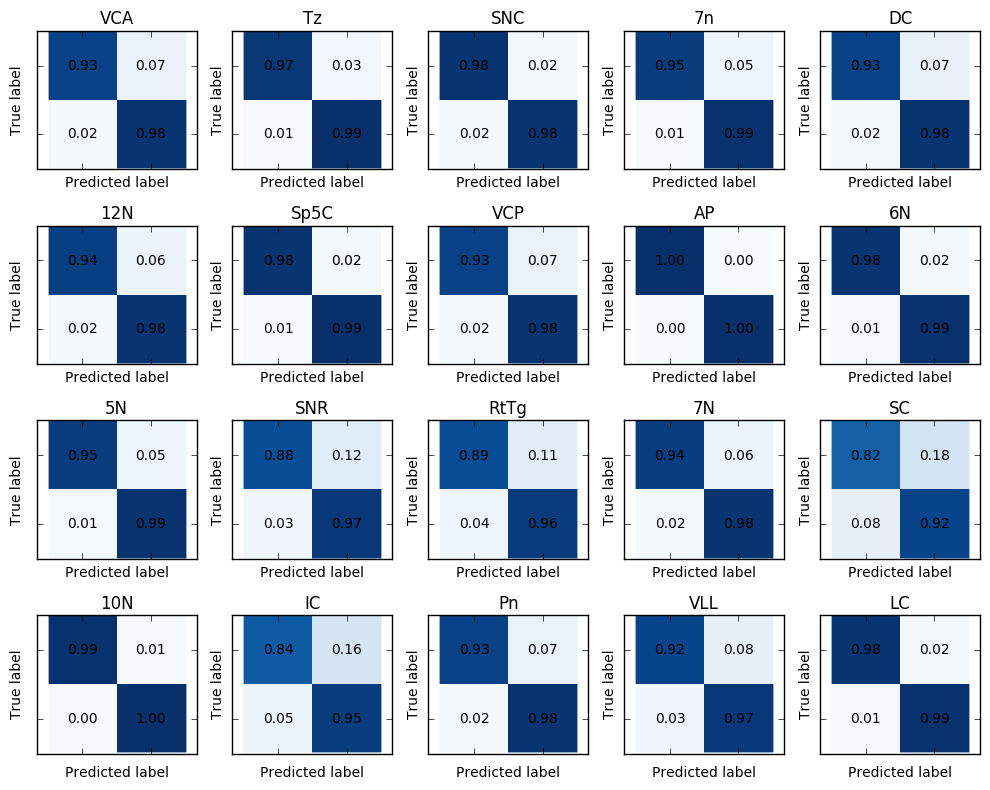

In [114]:
# Compute test accuracy

acc_all_structures = {}

# nrows = len(structures)/5 + 1
nrows = int(np.ceil(len(existing_names)/5.))
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
axes = axes.flatten()

# for i, label in enumerate(structures):
for i, label in enumerate(existing_names):
    
    features_pos = test_features[label]
    
#     features_neg = test_features[convert_to_surround_name(label)]
    
    if train_sample_scheme in [1,3,4,5,6,7]:
        features_neg = test_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([test_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [test_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    elif train_sample_scheme == 8:
        features_neg = training_features[label + '_negative']
    else:
        sys.stderr.write('training scheme is not recognized.\n')
        
    
    test_data = np.r_[features_pos, features_neg]
    test_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
    svc = svc_allClasses[label]
    
    probs = svc.predict_proba(test_data)[:, svc.classes_.tolist().index(1.)]
    cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=True)
    
    acc_all_structures[label] = .5 * (cm[0,0] + cm[1,1])
    
    plot_confusion_matrix(cm, title='%(label)s'% {'label':label},
                          labels=['',''],
#                           labels=[label, convert_to_surround_name(label)],
                         axis=axes[i])
#     plt.show();

plt.tight_layout()

In [115]:
print 'test accuracy:', np.mean(acc_all_structures.values())

test accuracy: 0.957087655884
